In [150]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from time import time
import datetime

In [151]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [152]:
housing.shape

(545, 13)

In [153]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
           
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [154]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)


In [155]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df = housing[num_vars]
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
0,7420,4,2,3,1,0,0,0,1,2,1,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,12250000
3,7500,4,2,2,1,0,1,0,1,3,1,12215000
4,7420,4,1,2,1,1,1,0,1,2,0,11410000


In [156]:
df.shape

(545, 12)

In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = df.loc[:, num_vars].values
x = StandardScaler().fit_transform(x)
df.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
0,7420,4,2,3,1,0,0,0,1,2,1,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,12250000
3,7500,4,2,2,1,0,1,0,1,3,1,12215000
4,7420,4,1,2,1,1,1,0,1,2,0,11410000


In [158]:
k=1    #设置降维的占比
pca= PCA(n_components=k)#调用PCA函数，先实例化
pcaCom = pca.fit_transform(x)
pcaCom = pd.DataFrame(pcaCom)
print("主成分的数量：",pca.n_components_)
X = pcaCom.iloc[:, [0]].values
#X = pcaCom.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]].values
Y = df.iloc[:, 11].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

主成分的数量： 1


In [159]:
from sklearn.svm import SVR

Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVR(kernel = kernel
             , C=1e3
             , gamma="auto"
           ).fit(X_train,Y_train)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(X_test,Y_test)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR (kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, Y_train).predict(X_test)
y_poly = svr_poly.fit(X_train, Y_train).predict(X_test)

The accuracy under kernel linear is 0.586657
00:00:007734
The accuracy under kernel poly is 0.260309
00:00:007915
The accuracy under kernel rbf is 0.027422
00:00:009862
The accuracy under kernel sigmoid is 0.174441
00:00:009953


In [160]:
print('精确度：%.4f'%(svr_rbf.score(X_test,Y_test)))

精确度：0.0389


In [161]:
#X_train
#X_test


In [162]:
#Y_test

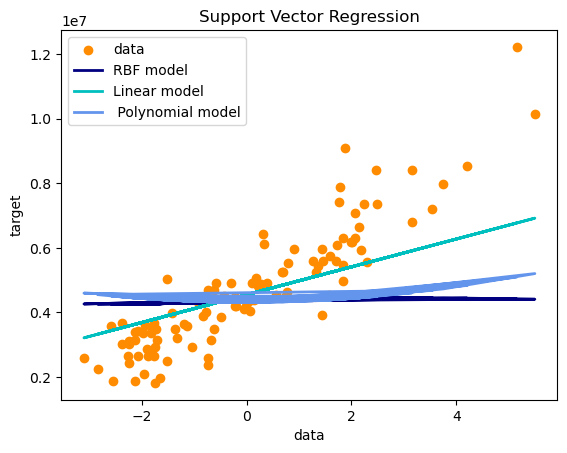

In [163]:
lw = 2
plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(X_test, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_test, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_test, y_poly, color='cornflowerblue', lw=lw, label=' Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend ()
plt.show()